In [8]:
from numpy import *; from matplotlib.pyplot import *
import sys; sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
import predefined as pd
from scipy.signal import fftconvolve

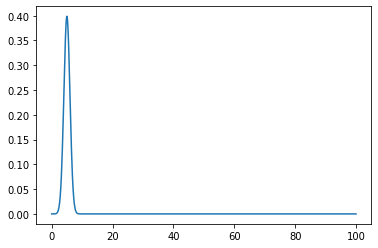

In [9]:
def gauss(t,mu=0,sigma=1):
    return (2*3.14159*sigma**2.)**(-0.5)*exp(-(t-t[mu])**2./(2.*sigma**2.))
t=linspace(0,100,1000)
plot(t,gauss(t,mu=50))
show()

def fit_convolution(X,a,sigma):
    '''X= fithist, ALL bins, and the length of fithist'''
    hist,bins,fitLength,mu=X
#     print(a,sigma)
    return a*fftconvolve(hist,gauss(bins,mu=mu,sigma=sigma))[mu:mu+fitLength]


20.02002002002002


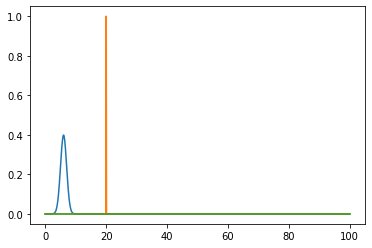

In [3]:
d=np.zeros_like(t)
d[200]=1
print(t[200])
sigma=1
mu=60
beg,end=len(t[t<mu]),len(t)+len(t[t<mu])
plot(t,gauss(t,mu=mu,sigma=sigma))
# con=convolve(d,gauss(t,mu=mu,sigma=sigma),mode='full')[beg:end]
fftcon=fftconvolve(d,gauss(t,mu=mu,sigma=sigma),mode='full')[beg:end]
# diff=(con-fftcon)
plot(t,d)
# plot(t,con
plot(t,fftcon)

1349 395 350 70 650 320 400 749


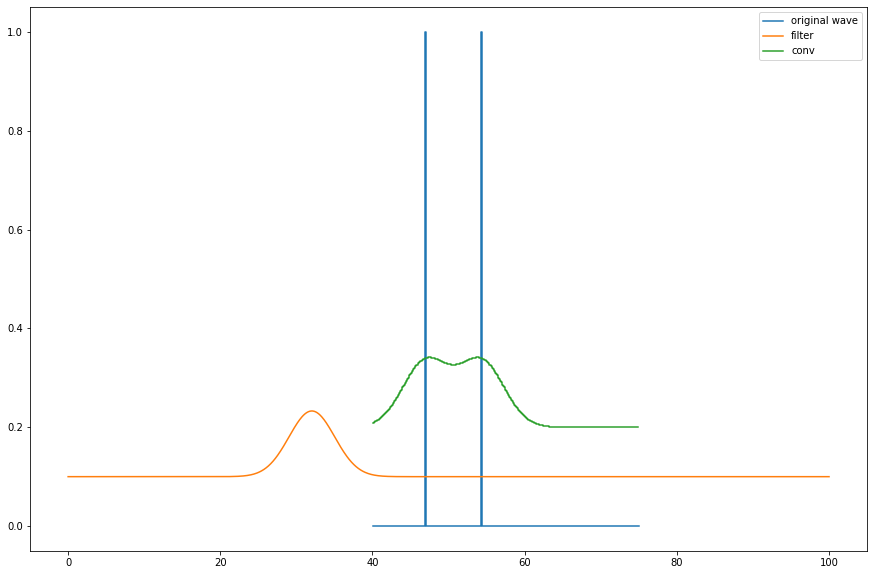

In [4]:
t=linspace(0,100,1000)
trutharray=(t>40)*(t<75)
d=np.zeros_like(t[trutharray])
fitbins=t[trutharray]
bIn=70
d[bIn]=1
d[bIn+73]=1
sigma=3
mu=320
beg,end=np.where(t==t[trutharray][0])[0][0],np.where(t==t[trutharray][-1])[0][0]
# mu=t[int(end-beg/2)]

# beg,end=len(t[t<mu]),len(t)+len(t[t<mu])
# plot(t,gauss(t,mu=mu,sigma=sigma))
# con=convolve(d,gauss(t,mu=mu,sigma=sigma),mode='full')[beg:end]
fftcon=fftconvolve(d,gauss(t,mu=mu,sigma=sigma),mode='full')
# diff=(con-fftcon)
fig,ax=subplots(nrows=1,ncols=1,figsize=(15,10))
ax.plot(t[trutharray],d,ds='steps',label='original wave')
plot(t,gauss(t,mu,sigma)+0.1,label='filter')
# ax[1].plot(arange(len(fftcon)),fftcon)
print(len(fftcon),np.argmax(fftcon),len(d),np.argmax(d),len(t)-len(d),mu,beg,end)
# beg,end=0,len(t)
ax.plot(t[beg-mu:end-mu]+t[mu],fftcon[mu:mu+end-beg]+0.2,ds='steps',label='conv')
legend()
# plot()
# plot(t,con
# plot(t,fftcon)

[(64, 'E', 2.50146252) (64, 'W', 4.06571899) (65, 'W', 2.29445611)]


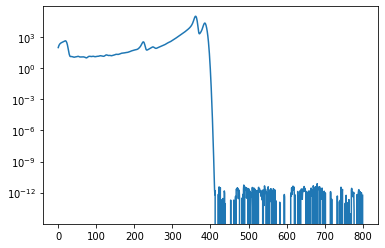

In [14]:
simloc= '/home/noah/Desktop/large_analysis/zeck_simulation/'
snsim=np.load(simloc+'snbpdip/113Sn-single_event.npy')
snsim=snsim.view(recarray)
det_resp='/home/noah/Desktop/large_analysis/ca_analysis/detector_response/detector_response.npy'
det_resp=load(file=det_resp); det_resp=det_resp.view(recarray)
trutharray=(snsim.pixel==64)*(snsim.detector=='W')
h,bins=histogram(snsim.energy[trutharray],bins=1000,range=[0,800])
bins=pd.cbins(bins)
mu=400
hcon=fftconvolve(h,gauss(bins,mu=mu,sigma=det_resp.sigma[0]),mode='full')
plot(bins,hcon[mu:mu+len(bins)])
yscale('log')
print(det_resp)

In [17]:
print(pd.vectorboard(65)+pd.vectordetector('W'),pd.vectorchannel(65))

1 4
